In [1]:
from langgraph.graph import StateGraph
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI

In [2]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(),override=True)

True

In [3]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.5)

def chatbot(state : State):
    return {"messages" : [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")

graph = graph_builder.compile()

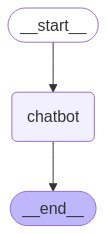

In [4]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

To print graph in Ascii install, pip install grandalf

> print(graph.get_graph().draw_ascii())

In [5]:
while True:
    user_input = input('User: ')
    if user_input.lower() in ["q", "quit", "exit", "bye"]:
        print("Goodbye")
        break

    for event in graph.stream({'messages' : ('user', user_input)}):
        for value in event.values():
            print(f"assistant: {value['messages'][-1].content}")
            print('-' *20)

KeyboardInterrupt: Interrupted by user

In [8]:
from tavily import TavilyClient
import os

client = TavilyClient(api_key=os.environ['TAVILY_API_KEY'])

response = client.search(query="who won 2024 ipl")
response

{'query': 'who won 2024 ipl',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Who won IPL 2024? What happened in the final between KKR and SRH?',
   'url': 'https://www.sportingnews.com/in/cricket/news/who-won-ipl-final-2024-kkr-srh/2d2abac1a403fa86e6c5afbd',
   'content': 'Who won IPL 2024? What happened in the final between KKR and SRH? | Sporting News India IPL IPL EXPLORE IPL NBA TEAMS EXPLORE FOOTBALL Cricket IPL NBA Football IPL Who won IPL 2024? Kolkata Knight Riders (KKR) beat Sunrisers Hyderabad (SRH) by eight wickets in the IPL 2024 Final at the MA Chidambaram Stadium in Chennai to lift a third IPL trophy on Sunday. With this result, KKR are now the third most successful team in the history of the league after Mumbai Indians and Chennai Super Kings who have won it five times each. MORE: Relive all the drama of the 2024 IPL Final here — IndianPremierLeague (@IPL) May 26, 2024 IPL Final 2024 result, score Sporting News',
   'score': 0.93221

In [9]:
for result in response['results']:
    print(f'Title: {result["title"]}, URL: {result["url"]}')

Title: Who won IPL 2024? What happened in the final between KKR and SRH?, URL: https://www.sportingnews.com/in/cricket/news/who-won-ipl-final-2024-kkr-srh/2d2abac1a403fa86e6c5afbd
Title: TATA IPL 2024 Final: KKR vs SRH - Cricket World, URL: https://www.cricketworld.com/tata-ipl-2024-final-kkr-vs-srh-kolkata-emerge-as-champions-for-third-time-after-a-decade/94606.htm
Title: 2024 Indian Premier League final - Wikipedia, URL: https://en.wikipedia.org/wiki/2024_Indian_Premier_League_final
Title: IPL 2024 final result: Kolkata Knight Riders beat Sunrisers ... - BBC, URL: https://www.bbc.com/sport/cricket/articles/cd114e2l99qo
Title: IPL 2024 Final: KKR crowned champions for 3rd time as SRH implode in ..., URL: https://www.indiatoday.in/sports/cricket/story/ipl-2024-final-kkr-vs-srh-kolkata-3rd-crown-shreyas-iyer-pat-cummins-chennai-2544139-2024-05-26


In [10]:
response = client.search(
    query="who won 2024 ipl",
    search_depth='advanced',
    max_results=7,
    include_images=True,
    include_answer=True,
    include_raw_content=False
)
response

{'query': 'who won 2024 ipl',
 'follow_up_questions': None,
 'answer': 'The Kolkata Knight Riders won the 2024 IPL by defeating the Sunrisers Hyderabad in the final match.',
 'images': ['https://tse-mm.bing.com/th?q=2024+ipl+winner+final+time+android',
  'https://tse-mm.bing.com/th?q=2024+ipl+winner+final+time+show',
  'https://statico.sportskeeda.com/editor/2025/02/ec101-17407642472000-1920.jpg',
  'https://tse1.mm.bing.net/th?q=2024+Ipl+Winner&w=1280&h=720&c=5&rs=1&p=0',
  'http://cricpoint.in/wp-content/uploads/2023/08/IPL-2024-Auction.webp'],
 'results': [{'url': 'https://en.wikipedia.org/wiki/2024_Indian_Premier_League_final',
   'title': '2024 Indian Premier League final - Wikipedia',
   'content': 'The Kolkata Knight Riders easily chased the target in 10.3 overs and won the match by eight wickets, thus winning their third IPL title.[4] KKR player Mitchell Starc was named as the player of the match for taking 2 wickets and 2 catches.[5] Sunil Narine (KKR) was named as the player 

In [11]:
answer = client.qna_search(query="who won 2023 ipl")
answer

'The Chennai Super Kings won the 2023 IPL, securing their fifth title by defeating the Gujarat Titans in the final.'

In [12]:
from langchain.adapters.openai import convert_openai_messages
from langchain_openai import ChatOpenAI

query = "who won 2023 ipl"

response = client.search(query=query, max_results=5, search_depth='advanced')['results']
response

[{'url': 'https://www.sportsrealize.com/2023-ipl-winner/',
  'title': '2023 IPL Winner, Runner-up, Playing Team, Final Venue',
  'content': 'Chennai Super Kings – 2023 IPL Champions. IPL 2023 Winner. Under the astute leadership of MS Dhoni, CSK continued their dominance in the IPL.',
  'score': 0.90102744,
  'raw_content': None},
 {'url': 'https://en.wikipedia.org/wiki/2023_Indian_Premier_League_final',
  'title': '2023 Indian Premier League final - Wikipedia',
  'content': 'After winning the toss, Chennai Super Kings elected to field, with Gujarat Titans scoring 214 runs for 4 wickets, setting the record for the highest team total in an IPL final.[1] Due to inclement weather, the Super Kings\' innings was delayed by over an hour, and the target was adjusted by the Duckworth–Lewis–Stern (DLS) method to 171 runs in 15 overs; the team would ultimately win by five wickets, securing their fifth IPL title. ^ "IPL 2023, Gujarat Titans Vs Chennai Super Kings: Shubman Gill Powers GT To 5-Wicke

In [13]:
prompt = [
    {
        'role': 'system',
        'content': f'you are an AI critical thinker research assistant.'
                   f'your sole purpose is to write a well written, objective and structured reports on given text.'
    },
    {
        'role': 'user',\
        'content':f'Information {response}'
                  f'Using the above information, answer the following query: {query} in a detailed report'
    }
]

lc_messages = convert_openai_messages(prompt)
lc_messages

[SystemMessage(content='you are an AI critical thinker research assistant.your sole purpose is to write a well written, objective and structured reports on given text.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Information [{\'url\': \'https://www.sportsrealize.com/2023-ipl-winner/\', \'title\': \'2023 IPL Winner, Runner-up, Playing Team, Final Venue\', \'content\': \'Chennai Super Kings – 2023 IPL Champions. IPL 2023 Winner. Under the astute leadership of MS Dhoni, CSK continued their dominance in the IPL.\', \'score\': 0.90102744, \'raw_content\': None}, {\'url\': \'https://en.wikipedia.org/wiki/2023_Indian_Premier_League_final\', \'title\': \'2023 Indian Premier League final - Wikipedia\', \'content\': \'After winning the toss, Chennai Super Kings elected to field, with Gujarat Titans scoring 214 runs for 4 wickets, setting the record for the highest team total in an IPL final.[1] Due to inclement weather, the Super Kings\\\' innings was delayed by over an

In [14]:
response = ChatOpenAI(model="gpt-4o-mini", temperature=0.5).invoke(lc_messages)
print(response.content)

# Detailed Report on the Winner of the 2023 Indian Premier League

## Introduction
The 2023 Indian Premier League (IPL) concluded with a dramatic final that saw the Chennai Super Kings (CSK) emerge as champions. This report outlines the details surrounding the final match, the performance of the teams, and the significance of this victory in the context of IPL history.

## Overview of the Final Match
The IPL 2023 final was contested between the Chennai Super Kings and the Gujarat Titans. The match was originally scheduled for May 28, 2023, but due to inclement weather, it was postponed to May 29, 2023, which was designated as a reserve day. 

### Match Details
- **Venue**: The final was played at the Narendra Modi Stadium in Ahmedabad.
- **Toss**: CSK won the toss and elected to field first.
- **Gujarat Titans' Innings**: The Titans scored 214 runs for 4 wickets, setting a record for the highest team total in an IPL final.
- **CSK's Innings**: Due to rain interruptions, CSK's target wa

### Tools

In [15]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool = TavilySearchResults(max_results=5)
tools = [tool]

In [16]:
response = tool.invoke('what is gpt4.5')
response

[{'url': 'https://venturebeat.com/ai/openai-releases-gpt-4-5/',
  'content': 'It’s here: OpenAI has announced the release of GPT-4.5, a research preview of its latest and most powerful large language model (LLM) for chat applications. During the livestream, OpenAI researchers noted how it was trained on data generated by smaller AI models and that this improved its “world model.” They also stated it was pre-trained across multiple data centers concurrently, suggesting a decentralized approach similar to that of rival lab Nous Research. At the same time, the pricing for GPT-4.5 through OpenAI’s API for third-party developers looking to build applications on the model appears shockingly high, at $75/$180 per million input/output tokens compared to $2.50/$10 for GPT-4o. As AI continues to evolve, GPT-4.5 marks another milestone in OpenAI’s pursuit of more capable, reliable, and user-aligned language models, promising new opportunities for innovation in the enterprise landscape.'},
 {'url'

In [17]:
llm.bind_tools(tools)

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000018C5FA08140>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000018C5FA09DF0>, root_client=<openai.OpenAI object at 0x0000018C5F6C5B80>, root_async_client=<openai.AsyncOpenAI object at 0x0000018C5FA081A0>, model_name='gpt-4o-mini', temperature=0.5, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search_results_json', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'search query to look up', 'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [20]:
from langgraph.prebuilt import ToolNode, tools_condition

In [21]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.5)
llm_with_tools = llm.bind_tools(tools)

def chatbot(state : State):
    return {"messages" : [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=tools))

graph_builder.add_conditional_edges(
    'chatbot',
    tools_condition
)

graph_builder.add_edge('tools', 'chatbot')

graph_builder.set_entry_point("chatbot")
# graph_builder.set_finish_point("chatbot")

graph_with_tools = graph_builder.compile()

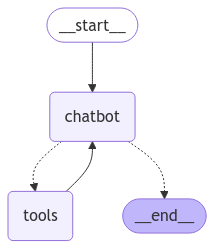

In [22]:
display(Image(graph_with_tools.get_graph().draw_mermaid_png()))

In [23]:
while True:
    user_input = input('User: ')
    if user_input.lower() in ["q", "quit", "exit", "bye"]:
        print("Goodbye")
        break

    for event in graph.stream({'messages' : ('user', user_input)}):
        for value in event.values():
            print(f"assistant: {value['messages'][-1].content}")

            print('-' *20)

assistant: I'm sorry, but I don't have access to real-time data or events that occurred after October 2023, including the IPL 2024 final. You can check the latest sports news or the official IPL website for the most current information on the match and the Man of the Match award.
--------------------
assistant: In the IPL 2023 final, Devon Conway of Chennai Super Kings (CSK) was awarded the Man of the Match for his outstanding performance. He scored 47 runs off 25 balls, helping CSK secure their fifth IPL title.
--------------------
Goodbye


In [24]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.checkpoint.sqlite import SqliteSaver

memory = SqliteSaver.from_conn_string(':memory:')
graph_with_tools = graph_builder.compile(checkpointer=MemorySaver())

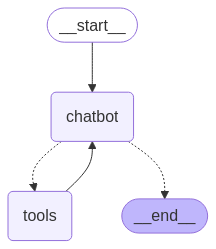

In [25]:
display(Image(graph_with_tools.get_graph().draw_mermaid_png()))

In [26]:
config = {
    'configurable' : {
        'thread_id' : '1'
    }
}

In [27]:
prompt = 'hi my name is srikanth'
events = graph_with_tools.stream(
    {'messages' : ('user', prompt)},
    config=config,
    stream_mode='values'
)
for event in events:
    event['messages'][-1].pretty_print()

================================ Human Message =================================

hi my name is srikanth
================================== Ai Message ==================================

Hello Srikanth! How can I assist you today?


In [30]:
prompt = 'what is my name, can you call me with my name'
events = graph_with_tools.stream(
    {'messages' : ('user', prompt)},
    config=config,
    stream_mode='values'
)
for event in events:
    print(event)
    event['messages'][-1].pretty_print()

{'messages': [HumanMessage(content='hi my name is srikanth', additional_kwargs={}, response_metadata={}, id='5d971109-d39d-4cf9-bd89-5f35a746e595'), AIMessage(content='Hello Srikanth! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 86, 'total_tokens': 100, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-b017110c-5cf8-41d4-a9ea-04b64e85c02a-0', usage_metadata={'input_tokens': 86, 'output_tokens': 14, 'total_tokens': 100, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='what is my name, can you call me with my name', additional_

In [29]:
snap_shot = graph_with_tools.get_state(config)
snap_shot

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is srikanth', additional_kwargs={}, response_metadata={}, id='5d971109-d39d-4cf9-bd89-5f35a746e595'), AIMessage(content='Hello Srikanth! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 86, 'total_tokens': 100, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_06737a9306', 'finish_reason': 'stop', 'logprobs': None}, id='run-b017110c-5cf8-41d4-a9ea-04b64e85c02a-0', usage_metadata={'input_tokens': 86, 'output_tokens': 14, 'total_tokens': 100, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='what is my name, can you call me with 

### Reflection

In [31]:
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

In [32]:
# generation_prompt = ChatPromptTemplate.from_messages(
#
# )

In [43]:
x= [1,2,3]
y = x.append([4,5,6])